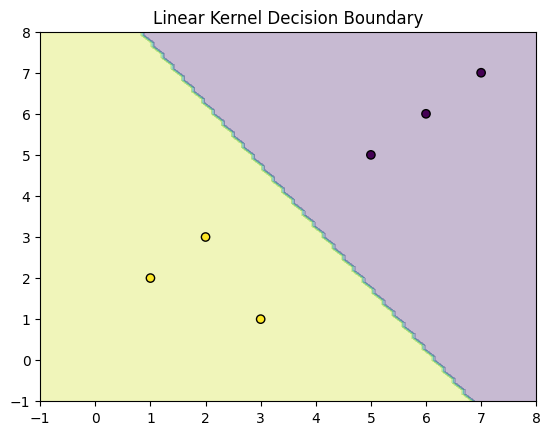

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset
X = np.array([[1, 2], [2, 3], [3, 1], [5, 5], [6, 6], [7, 7]])  # Feature vectors
y = np.array([1, 1, 1, 0, 0, 0])  # Labels

# Train an SVM model with a linear kernel
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1, 8, 100), np.linspace(-1, 8, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("Linear Kernel Decision Boundary")
plt.show()

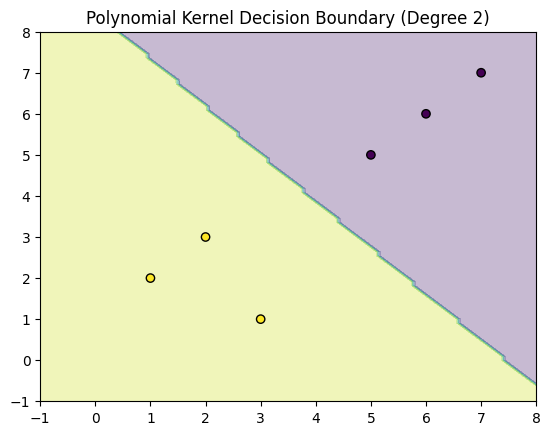

In [2]:
# Train an SVM model with a polynomial kernel (degree 2)
clf_poly = SVC(kernel='poly', degree=2)
clf_poly.fit(X, y)

# Plot decision boundary
Z_poly = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

plt.contourf(xx, yy, Z_poly, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("Polynomial Kernel Decision Boundary (Degree 2)")
plt.show()


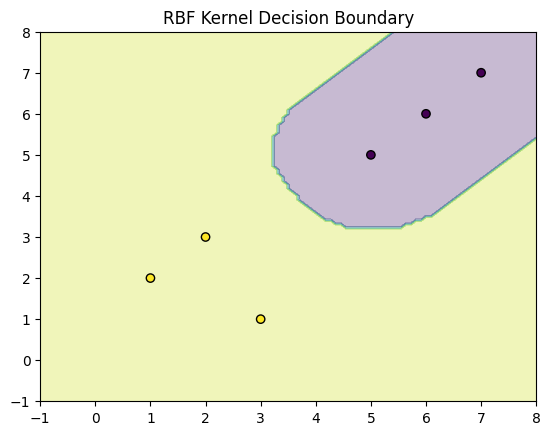

In [3]:
# Train an SVM model with an RBF kernel
clf_rbf = SVC(kernel='rbf', gamma=1)
clf_rbf.fit(X, y)

# Plot decision boundary
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.contourf(xx, yy, Z_rbf, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("RBF Kernel Decision Boundary")
plt.show()


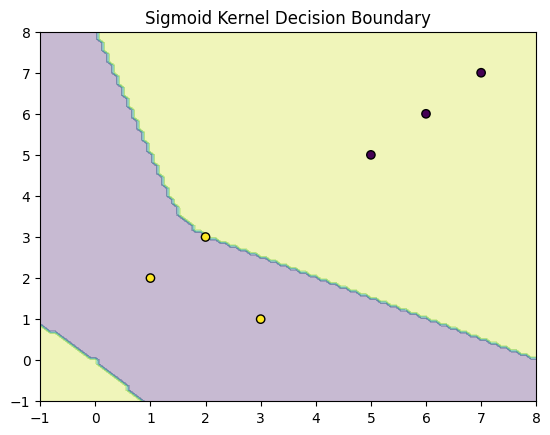

In [4]:
# Train an SVM model with a sigmoid kernel
clf_sigmoid = SVC(kernel='sigmoid', gamma=1, coef0=1)
clf_sigmoid.fit(X, y)

# Plot decision boundary
Z_sigmoid = clf_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sigmoid = Z_sigmoid.reshape(xx.shape)

plt.contourf(xx, yy, Z_sigmoid, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("Sigmoid Kernel Decision Boundary")
plt.show()


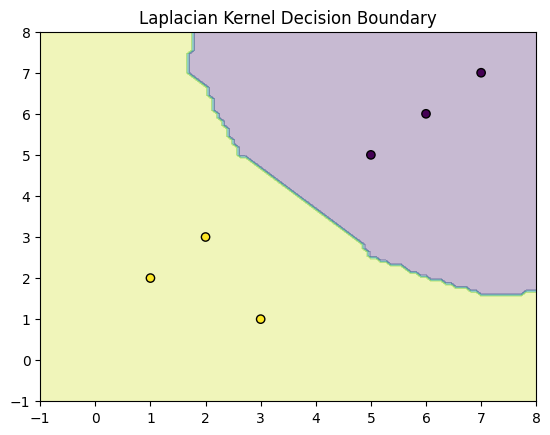

In [5]:
# Laplacian kernel can be approximated by using RBF with a small change in distance calculation
from sklearn.metrics.pairwise import laplacian_kernel

# Train an SVM model with a Laplacian kernel
clf_laplacian = SVC(kernel='precomputed')
K = laplacian_kernel(X)  # Compute Laplacian kernel matrix
clf_laplacian.fit(K, y)

# Plot decision boundary
# Calculate the kernel matrix between the meshgrid points and the training data X
K_meshgrid = laplacian_kernel(np.c_[xx.ravel(), yy.ravel()], X)
Z_laplacian = clf_laplacian.predict(K_meshgrid)
Z_laplacian = Z_laplacian.reshape(xx.shape)

plt.contourf(xx, yy, Z_laplacian, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("Laplacian Kernel Decision Boundary")
plt.show()

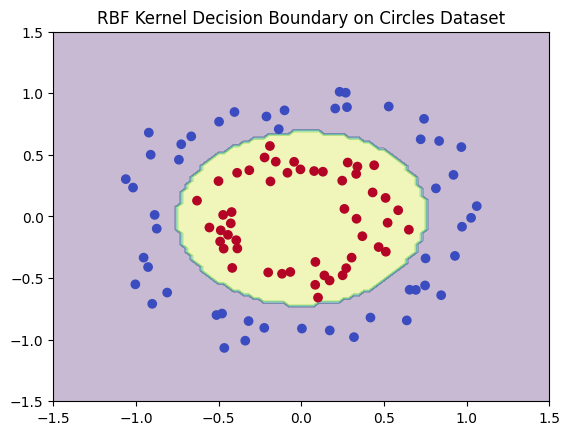

In [6]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np # Corrected alias from n to np

X, y = make_circles(noise=0.1, factor=0.5, random_state=1)
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(X, y)

# Plot decision boundary
# Use xx and yy from previous cells
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100)) # Define xx and yy for the new dataset range
Z_rbf = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.contourf(xx, yy, Z_rbf, alpha=0.3) # Use xx and yy for contourf

# Plot
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title("RBF Kernel Decision Boundary on Circles Dataset") # Added title
plt.show() # Added show() to display the plot

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
clf = GridSearchCV(SVC(), params, cv=5)
clf.fit(X, y)

print("Best Kernel:", clf.best_params_['kernel'])


Best Kernel: rbf


## 🧭 Rules of Thumb

🟢 Few features (2–10), nonlinear patterns → **RBF**

🟢 Many features (hundreds/thousands) → **Linear**

🔵 Curved but structured patterns → **Polynomial**

⚪ Experimental/rare cases → **Sigmoid**

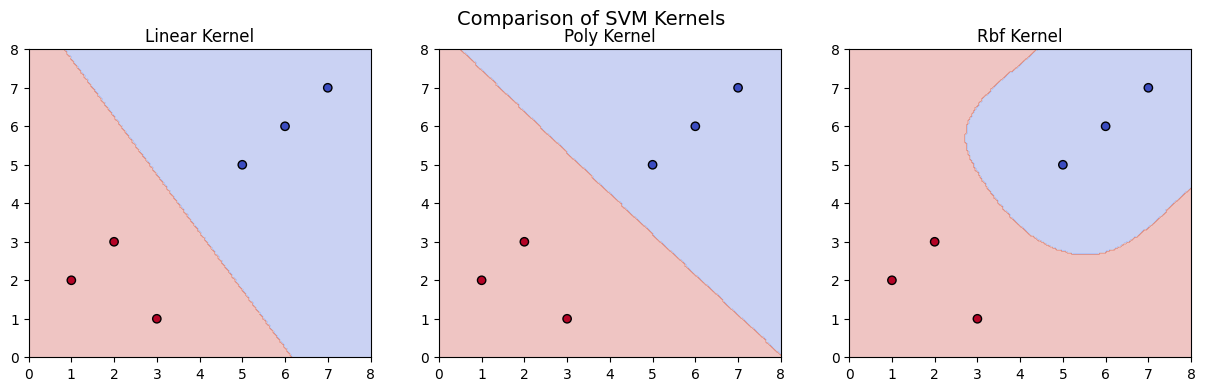

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create a simple 2D dataset
X = np.array([[1, 2], [2, 3], [3, 1],
              [5, 5], [6, 6], [7, 7]])
y = np.array([1, 1, 1, 0, 0, 0])

# Different kernels to compare
kernels = ['linear', 'poly', 'rbf']

plt.figure(figsize=(15, 4))

for i, kernel in enumerate(kernels, 1):
    clf = SVC(kernel=kernel, degree=3, C=1, gamma='auto')
    clf.fit(X, y)

    # Create a mesh grid for visualization
    xx, yy = np.meshgrid(np.linspace(0, 8, 200),
                         np.linspace(0, 8, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(f"{kernel.capitalize()} Kernel")

plt.suptitle("Comparison of SVM Kernels", fontsize=14)
plt.show()
